In [5]:
from energypy.interface.mountain_car import Directory

env_id = 'cartpole-v0'
run_directory = Directory('experiments', env_id, 'run_0')

In [6]:
run_directory()

'/Users/adam/energy-py/experiments/cartpole-v0/run_0'

In [7]:
def splitdir(d):
    return int(d.split('_')[1])

run_dir = run_directory()

policies = [d for d in os.listdir(run_dir)  if 'policy' in d]
policies = sorted(policies, key=splitdir)
policies = [os.path.join(run_dir, p) for p in policies]

rewards = []
for pol in policies:
    pol_rewards = [f for f in os.listdir(pol) if 'reward' in f]
    pol_rewards = [os.path.join(run_dir, pol, r) for r in pol_rewards]
    pol_rewards = [np.sum(np.load(d)) for d in pol_rewards]
    rewards.append(pol_rewards)
    
rewards = np.array(rewards)
rewards = np.mean(rewards, axis=1)

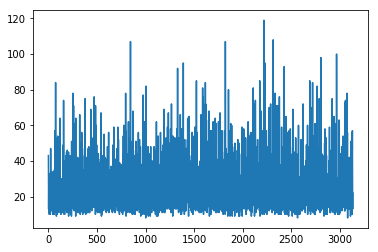

In [8]:
plt.plot(rewards)